# Project - Adverse Food Events

### IMPORT packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### IMPORT the Dataset

In [2]:
df = pd.read_csv("CAERS_ASCII_2004_2017Q2.csv") #df = dataframes

#### Check the values in datasets

In [3]:
df.head()

,RA_Report #,RA_CAERS Created Date,AEC_Event Start Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age at Adverse Event,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."
2,65333,1/1/2004,NaN,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,NaN,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
3,65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
4,65336,1/1/2004,NaN,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,NaN,Not Available,Not Available,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"


In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RA_Report #,90786.0,NaN,NaN,NaN,156577.560538,40382.318513,65325.0,125985.25,168433.0,190410.75,214610.0
RA_CAERS Created Date,90786,4020,8/3/2016,243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AEC_Event Start Date,53653,5174,5/6/2012,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRI_Product Role,90786,2,Suspect,74558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRI_Reported Brand/Product Name,90786,45685,REDACTED,6081,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRI_FDA Industry Code,90786.0,NaN,NaN,NaN,43.058082,16.553049,2.0,29.0,54.0,54.0,54.0
PRI_FDA Industry Name,90786,41,Vit/Min/Prot/Unconv Diet(Human/Animal),48501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CI_Age at Adverse Event,52926.0,NaN,NaN,NaN,50.755319,23.249385,0.0,35.0,53.0,68.0,736.0
CI_Age Unit,90786,6,Year(s),51331,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CI_Gender,90786,5,Female,58924,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(90786, 12)

In the following Dataset,we found out that it contains a total of 90786 data around 12 columns stating various type of entries about the harmfulness of the food items being manufactured and suplied in USA.

### Data Cleaning

The column names are so big and confusing and we cant use it in as it is condition,as it might lead us to error in further steps.So to make our work easier as well as the data set to be more understandable.We are going to start with the data cleaning by renaming the column name

In [6]:
df.rename(columns={"RA_Report #":"Report_no",
                   "RA_CAERS Created Date":"Created_date",
                   "AEC_Event Start Date":"Start_date",
                   "PRI_Product Role":"Products_role",
                   "PRI_Reported Brand/Product Name":"Products/Brand name",
                   "PRI_FDA Industry Code":"Industry_code",
                   "PRI_FDA Industry Name":"Industry_name",
                   "CI_Age at Adverse Event":"Age",
                   "CI_Age Unit":"Age_unit",
                   "CI_Gender":"Genders",
                   "AEC_One Row Outcomes":"Outcomes", 
                   "SYM_One Row Coded Symptoms":"Symptoms"},inplace=True)

In [7]:
df.columns

Index(['Report_no', 'Created_date', 'Start_date', 'Products_role',
       'Products/Brand name', 'Industry_code', 'Industry_name', 'Age',
       'Age_unit', 'Genders', 'Outcomes', 'Symptoms'],
      dtype='object')

In [8]:
df.head()

,Report_no,Created_date,Start_date,Products_role,Products/Brand name,Industry_code,Industry_name,Age,Age_unit,Genders,Outcomes,Symptoms
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."
2,65333,1/1/2004,NaN,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,NaN,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
3,65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
4,65336,1/1/2004,NaN,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,NaN,Not Available,Not Available,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"


In [9]:
# Define aggregation functions
aggregation_functions = {
    'Report_no': 'first',
    'Created_date': 'first',
    'Start_date': 'first',
    'Products_role': 'first',
    'Products/Brand name': 'first',
    'Industry_code': 'first',
    'Industry_name': 'first',
    'Age': 'first',
    'Age_unit': 'first',
    'Genders': 'first',
    'Outcomes': 'first',
    'Symptoms': 'first',
}

df = df.groupby('Report_no').aggregate(aggregation_functions, inplace=True).reset_index(drop=True)

# Group by 'Report_no' and aggregate other columns
#merged_df = df.groupby('Report_no').aggregate(aggregation_functions).reset_index()

# Print the resulting DataFrame


### Checking for Null values

In [10]:
df.isnull().sum()

Report_no                  0
Created_date               0
Start_date             27582
Products_role              0
Products/Brand name        0
Industry_code              0
Industry_name              0
Age                    32296
Age_unit                   0
Genders                    0
Outcomes                   0
Symptoms                   5
dtype: int64

We found that NULL values are present in three columns,so we are clearing them using fillna function,which will fill the empty sets with 0

In [11]:
df['Start_date'] = df['Start_date'].mask(df['Start_date'].isna(), df['Created_date'])

As some consumers haven't given the start of event date,we are gonna assume that the start_date is same as the created date as they have filled the report after the start of the adverse event

In [12]:
df['Start_date'].isnull().sum()

0

In [13]:
df['Created_date'] = pd.to_datetime(df['Created_date'])
df['Start_date'] = pd.to_datetime(df['Start_date'], errors='coerce')

Changing the valus in start_date and created_date into a datetime value

In [14]:
df['Age'].fillna((0.0), inplace=True)

In [15]:
df['Age'].isnull().sum()

0

In [16]:
df = df.dropna(subset=['Symptoms'])

In [17]:
df['Symptoms'].isnull().sum()

0

In [18]:
df.isnull().sum()

Report_no              0
Created_date           0
Start_date             0
Products_role          0
Products/Brand name    0
Industry_code          0
Industry_name          0
Age                    0
Age_unit               0
Genders                0
Outcomes               0
Symptoms               0
dtype: int64

As we can see,there are no NULL values in the dataset,So we can work with this dataset without any issues. 

In [19]:
df['Genders'].unique()

array(['Female', 'Not Available', 'Male', 'Unknown', 'Not Reported'],
      dtype=object)

In [20]:
df['Genders'].replace({'Unknown':'Others', 'Not Reported':'Others','Not Available':'Others'}, inplace=True)

In [21]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Report_no,64512.0,NaN,NaN,NaN,153693.741769,65325.0,120158.75,163482.5,189232.25,214610.0,41443.187708
Created_date,64512,NaN,NaN,NaN,2012-07-04 09:13:55.714285824,2004-01-01 00:00:00,2009-11-11 00:00:00,2013-03-18 00:00:00,2015-08-27 00:00:00,2017-06-30 00:00:00,NaN
Start_date,64512,NaN,NaN,NaN,2012-03-11 02:47:44.732142592,1931-06-19 00:00:00,2009-06-08 00:00:00,2012-11-23 00:00:00,2015-05-22 00:00:00,2017-06-30 00:00:00,NaN
Products_role,64512,2,Suspect,57675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Products/Brand name,64512,33749,REDACTED,6078,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Industry_code,64512.0,NaN,NaN,NaN,40.342711,2.0,24.0,53.0,54.0,54.0,17.54712
Industry_name,64512,40,Vit/Min/Prot/Unconv Diet(Human/Animal),27830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,64512.0,NaN,NaN,NaN,23.799557,0.0,0.0,0.0,50.0,736.0,29.355295
Age_unit,64512,6,Not Available,32301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genders,64512,3,Female,40812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.head(10)

,Report_no,Created_date,Start_date,Products_role,Products/Brand name,Industry_code,Industry_name,Age,Age_unit,Genders,Outcomes,Symptoms
0,65325,2004-01-01,2003-08-04,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,65333,2004-01-01,2004-01-01,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,0.0,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
2,65335,2004-01-01,2003-11-24,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Others,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
3,65336,2004-01-01,2004-01-01,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,0.0,Not Available,Others,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"
4,65345,2004-01-01,2003-12-21,Suspect,"FRITO LAY FUNYUNS ONION FLAVOR, ONION RINGS",7,Snack Food Item,10.0,Year(s),Male,NON-SERIOUS INJURIES/ ILLNESS,CHOKING
5,65350,2004-01-01,2004-01-01,Suspect,GRAPE,20,Fruit/Fruit Prod,0.0,Not Available,Others,DEATH,"DEATH, CHOKING"
6,65353,2004-01-02,2003-12-01,Suspect,HERBALIFE RELAX NOW,54,Vit/Min/Prot/Unconv Diet(Human/Animal),0.0,Not Available,Female,VISITED A HEALTH CARE PROVIDER,"PARANOIA, PHYSICAL EXAMINATION, DELUSION"
7,65354,2004-01-02,2004-01-02,Suspect,YOHIMBE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),66.0,Year(s),Male,REQ. INTERVENTION TO PRVNT PERM. IMPRMNT.,BLOOD PRESSURE INCREASED
8,65355,2004-01-02,2003-10-27,Suspect,CAL-C PEACH TROPIC ENRICHED BEVERAGE BLEND,29,Soft Drink/Water,0.0,Not Available,Male,NON-SERIOUS INJURIES/ ILLNESS,"RASH, FLUSHING, MALAISE, FAECES PALE, VOMITING..."
9,65356,2004-01-02,2003-10-27,Suspect,CAL-C PEACH TROPIC ENRICHED BEVERAGE BLEND,29,Soft Drink/Water,0.0,Not Available,Others,NON-SERIOUS INJURIES/ ILLNESS,"LOOSE STOOLS, ABDOMINAL PAIN UPPER, VOMITING, ..."


By EDA,we could see that cases which are recorded has been open mostly above a year.With this we could come to a fact that the department is doing there work very slowly

The product or brand name has been REDACTED mostly

<Axes: xlabel='Genders', ylabel='count'>

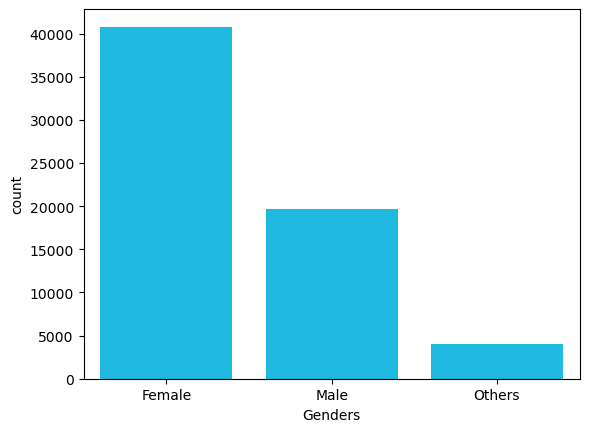

In [23]:
sns.countplot(x='Genders',data=df,color='#00ccff',order=df['Genders'].value_counts().index)

By the graph,we could say that the food products affected the Females mostly as more than 55000 complaints were registered by them,as males have complained around 28000.

Text(0.5, 1.0, 'Products Role Distribution')

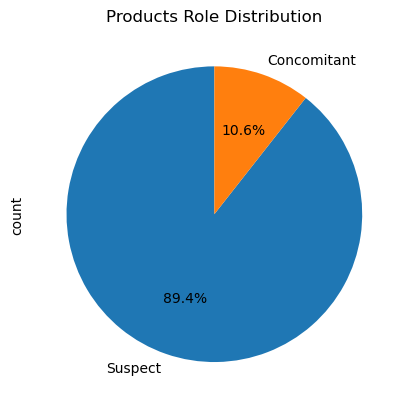

In [24]:
df['Products_role'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Products Role Distribution')

<Axes: xlabel='Products_role', ylabel='count'>

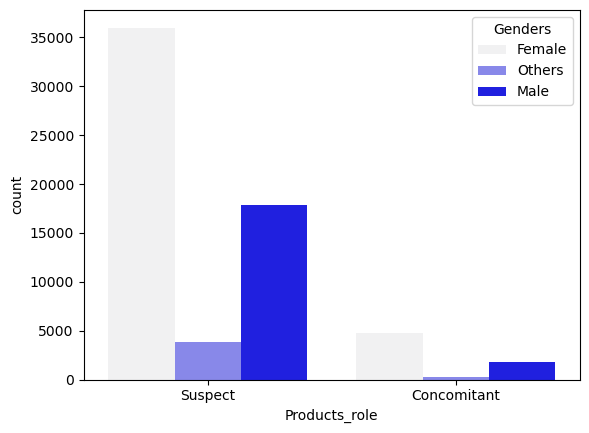

In [25]:
sns.countplot(x ='Products_role', data = df, hue = "Genders",color = 'blue')

There are consumers who reported on concomitant product and even on that the majority is Women as more than 10000 females have filled a report but very few men have only filed a report on it.

<Axes: xlabel='count', ylabel='Created_date'>

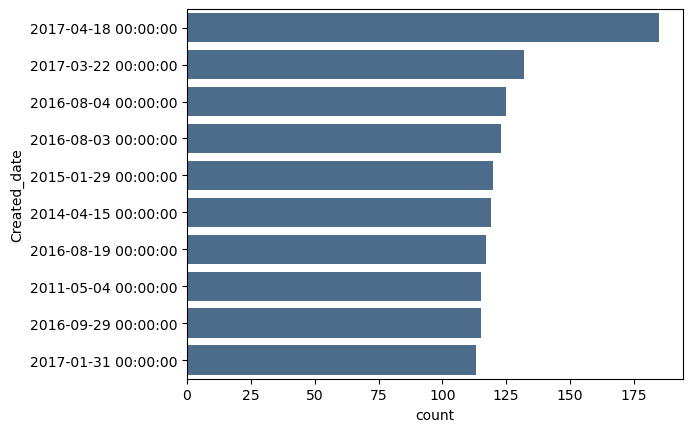

In [26]:
sns.countplot(y='Created_date',data=df,color='#436b95',order=df['Created_date'].value_counts().head(10).index)

<Axes: xlabel='count', ylabel='Created_date'>

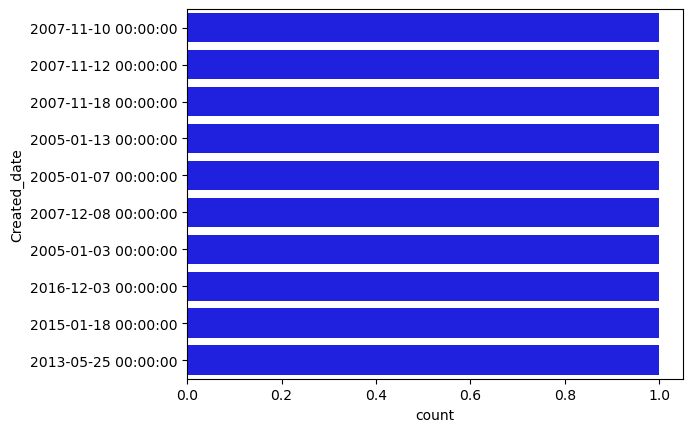

In [27]:
sns.countplot(y='Created_date',data=df,color='blue',order=df['Created_date'].value_counts().tail(10).index)

we could see that majority of the cases filed are from 2016,we could even call that year as a dark year in a food industry as most of the adverse events are caused in that particular year.

In [28]:
df.head()

,Report_no,Created_date,Start_date,Products_role,Products/Brand name,Industry_code,Industry_name,Age,Age_unit,Genders,Outcomes,Symptoms
0,65325,2004-01-01,2003-08-04,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,65333,2004-01-01,2004-01-01,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,0.0,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
2,65335,2004-01-01,2003-11-24,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Others,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
3,65336,2004-01-01,2004-01-01,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,0.0,Not Available,Others,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"
4,65345,2004-01-01,2003-12-21,Suspect,"FRITO LAY FUNYUNS ONION FLAVOR, ONION RINGS",7,Snack Food Item,10.0,Year(s),Male,NON-SERIOUS INJURIES/ ILLNESS,CHOKING


In [29]:
df

,Report_no,Created_date,Start_date,Products_role,Products/Brand name,Industry_code,Industry_name,Age,Age_unit,Genders,Outcomes,Symptoms
0,65325,2004-01-01,2003-08-04,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,65333,2004-01-01,2004-01-01,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,0.0,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
2,65335,2004-01-01,2003-11-24,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Others,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
3,65336,2004-01-01,2004-01-01,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,0.0,Not Available,Others,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"
4,65345,2004-01-01,2003-12-21,Suspect,"FRITO LAY FUNYUNS ONION FLAVOR, ONION RINGS",7,Snack Food Item,10.0,Year(s),Male,NON-SERIOUS INJURIES/ ILLNESS,CHOKING
...,...,...,...,...,...,...,...,...,...,...,...,...
64512,214478,2017-06-29,2017-06-20,Suspect,HONEST PERFECTLY GENTLE SWEET ORANGE VANILLA S...,53,Cosmetics,5.0,Year(s),Female,OTHER SERIOUS (IMPORTANT MEDICAL EVENTS),EYE IRRITATION
64513,214479,2017-06-29,2017-06-20,Suspect,HONEST PERFECTLY GENTLE SWEET ORANGE VANILLA S...,53,Cosmetics,2.0,Year(s),Female,OTHER SERIOUS (IMPORTANT MEDICAL EVENTS),EYE IRRITATION
64514,214516,2017-06-29,2017-01-20,Concomitant,CALTRATE CALCIUM,54,Vit/Min/Prot/Unconv Diet(Human/Animal),66.0,Year(s),Female,"HOSPITALIZATION, VISITED AN ER",SWELLING
64515,214604,2017-06-30,2017-06-30,Suspect,DR. PERICONE NECK & CHEST CREAM,53,Cosmetics,0.0,Not Available,Female,NON-SERIOUS INJURIES/ ILLNESS,"VOMITING, URTICARIA, RASH"


<Axes: xlabel='count', ylabel='Industry_name'>

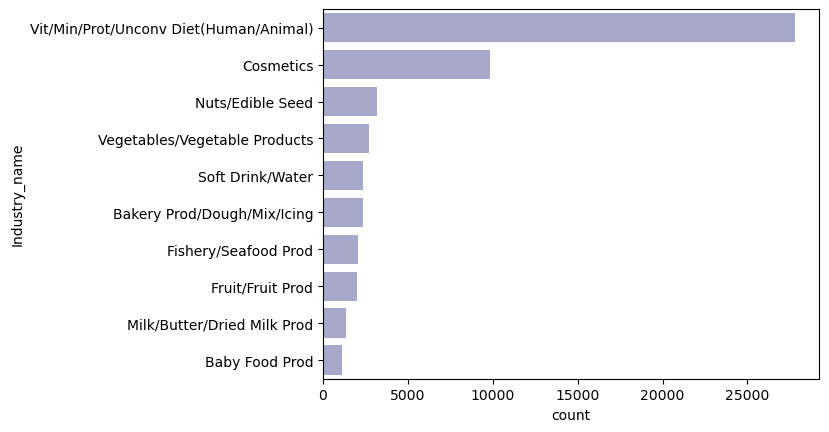

In [30]:
sns.countplot(y='Industry_name',data=df,color='#a2a2d0' ,order=df['Industry_name'].value_counts().head(10).index)

vit/min/prot/unconv diet(Human/Animal) is the most reported product type by consumers.As to make sure that this product is healthy,The industry has used various substances that are causing various trouble to human body.

<Axes: xlabel='count', ylabel='Symptoms'>

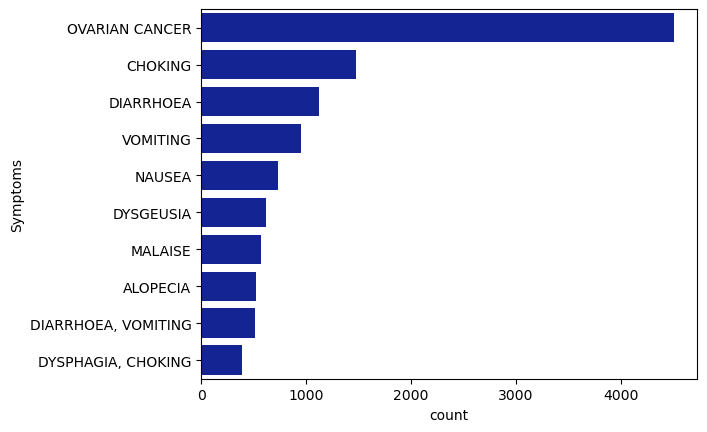

In [31]:
sns.countplot(y='Symptoms',data=df, color = '#0014a8' ,order=df['Symptoms'].value_counts().head(10).index)

Out of all the symptoms,Ovarian Cancer has been reported mostly which is a deadly disease.

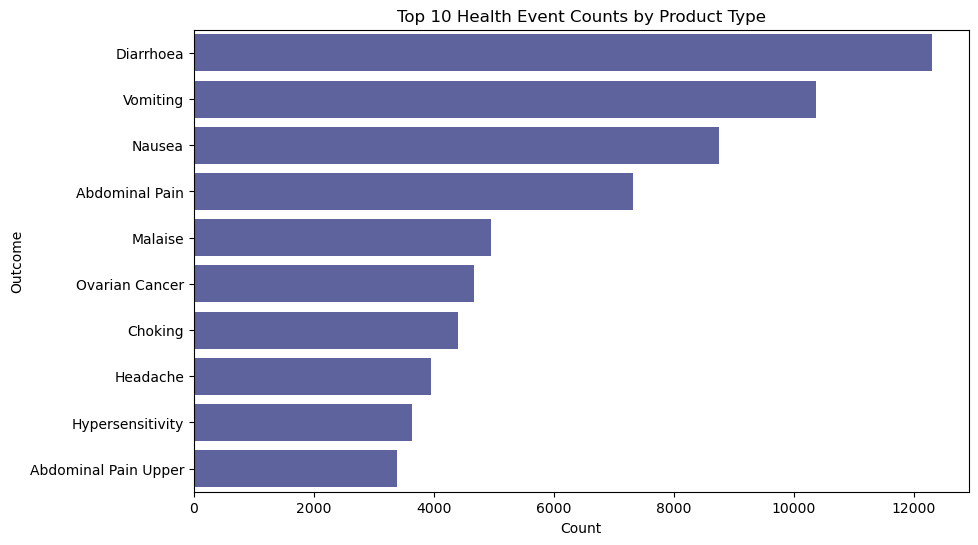

In [32]:
outcomes = []

# Iterate through the 'Symptoms' column and split the values
for row in df['Symptoms']:
    if isinstance(row, str):
        symptoms = [s.strip().title() for s in row.split(',')]
        outcomes.extend(symptoms)

outcome_df = pd.DataFrame({'Outcome': pd.Series(outcomes).value_counts().index, 'Count': pd.Series(outcomes).value_counts()})[:10]

# Create the bar plot for the top 10 values
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Count', y='Outcome', data=outcome_df ,color = '#545aa7')
plt.title('Top 10 Health Event Counts by Product Type')
plt.show()

<Axes: xlabel='count', ylabel='Outcomes'>

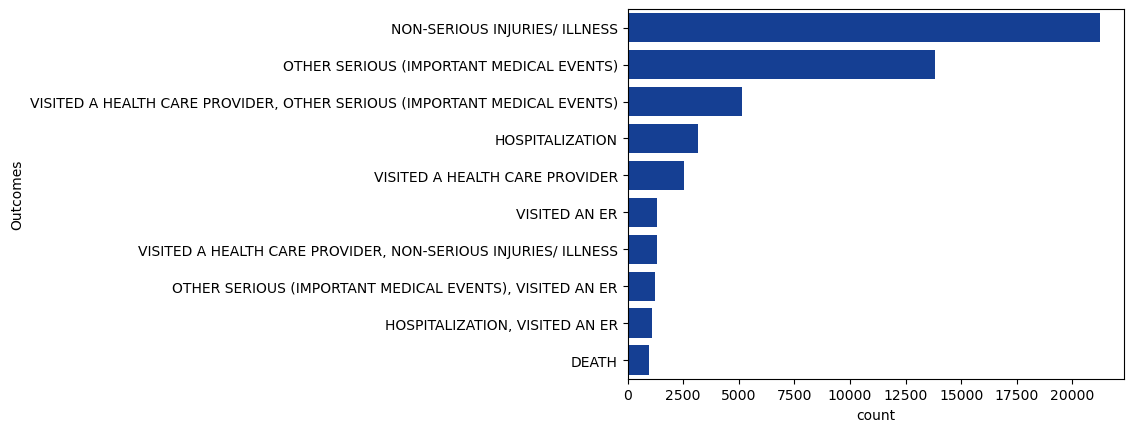

In [33]:
sns.countplot(y='Outcomes',data=df,color = '#0038a8',order=df['Outcomes'].value_counts().head(10).index)

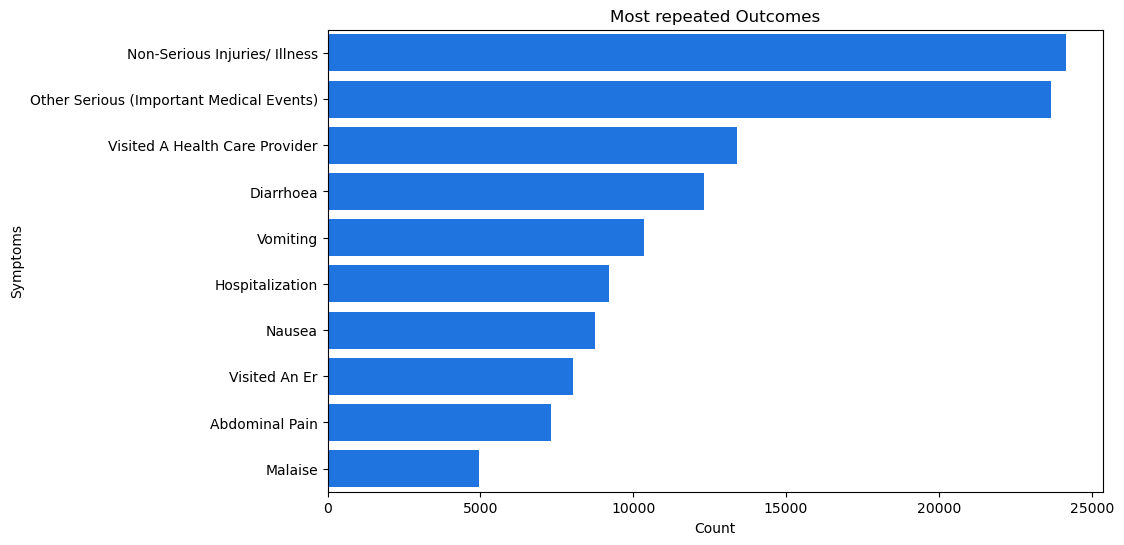

In [34]:
Symptoms = []

# Iterate through the 'Symptoms' column and split the values
for row in df['Outcomes']:
    if isinstance(row, str):
        symptoms = [s.strip().title() for s in row.split(',')]
        outcomes.extend(symptoms)

outcome_df = pd.DataFrame({'Symptoms': pd.Series(outcomes).value_counts().index, 'Count': pd.Series(outcomes).value_counts()})[:10]

# Create the bar plot for the top 10 values
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Count', y='Symptoms', data=outcome_df ,color = '#0070ff')
plt.title('Most repeated Outcomes')
plt.show()

With the Data obtained from outcomes,we could see that most of the outcomes because of the products where Non-Serious with around 25000 reports but followed to it we have Other serious  

<Axes: xlabel='count', ylabel='Products/Brand name'>

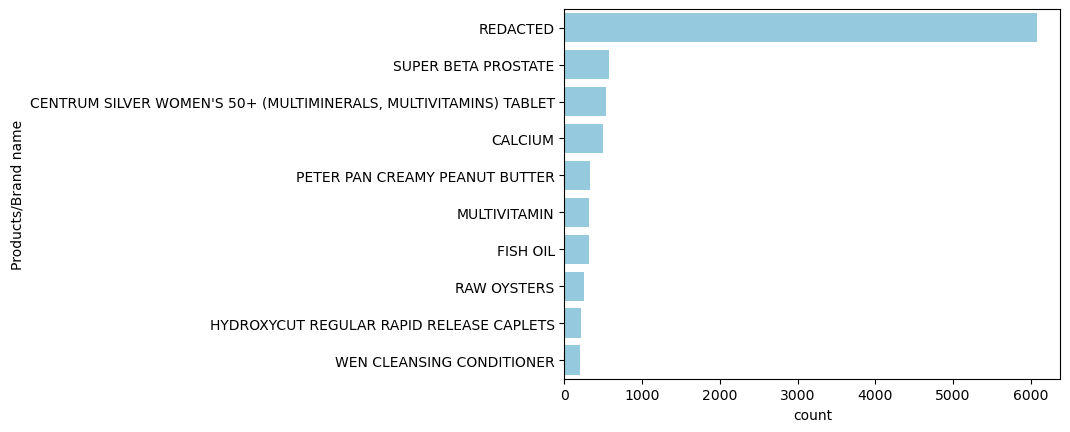

In [35]:
sns.countplot(y='Products/Brand name',data=df,color='skyblue',order=df['Products/Brand name'].value_counts().head(10).index)

<Axes: xlabel='count', ylabel='Industry_code'>

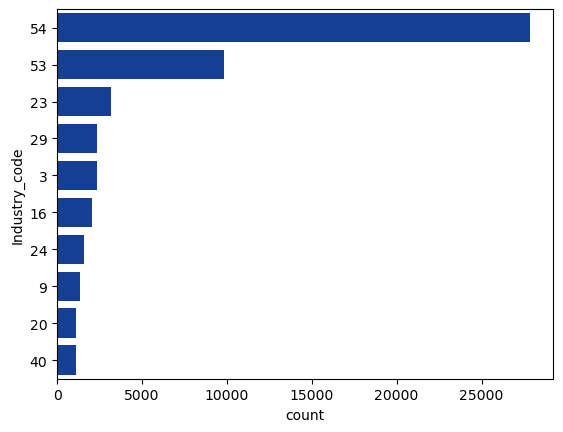

In [36]:
sns.countplot(y='Industry_code',data=df,color = '#0038a8',order=df['Industry_code'].value_counts().head(10).index)

As we know that 54 has more reports,54 is the industry code for Vit/min/prot/unconv diet(Human/Animal).

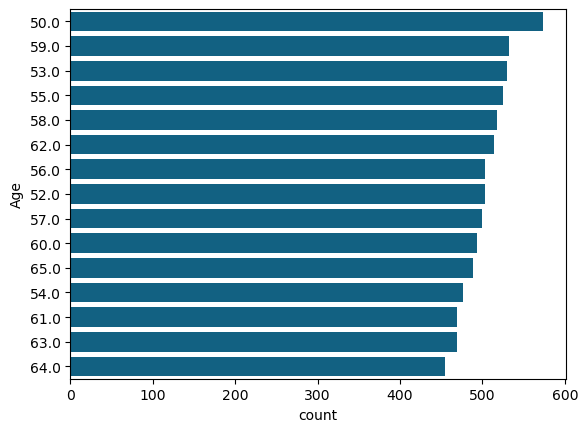

In [37]:
def convert_to_years(row):
    age = row['Age']
    unit = row['Age_unit'].lower()

    if unit == 'year(s)':
        return age, 'Years'
    elif unit == 'month(s)':
        return age / 12, 'Years'
    elif unit == 'week(s)':
        return age / 52, 'Years'
    elif unit == 'day(s)':
        return age / 365, 'Years'
    elif unit == 'decade(s)':
        return age * 10, 'Years'
    else:
        return age, 'Years'

# Apply the conversion function to the entire DataFrame
#df[['Age', 'Age_unit']] = df.apply(convert_to_years, axis=1, result_type='expand')
# Apply the conversion function to the entire DataFrame
df[['Age', 'Age_unit']] = df.apply(convert_to_years, axis=1, result_type='expand')

# Filter out entries where Age is 0
filtered_df = df[df['Age'] != 0]

# Create the count plot
sns.countplot(y='Age', data=filtered_df, color='#006994', order=filtered_df['Age'].value_counts().head(15).index)

# Display the plot
plt.show()

The majority of the affected people are on there 50's,so it had a very less impact on young people.

In [38]:
df

,Report_no,Created_date,Start_date,Products_role,Products/Brand name,Industry_code,Industry_name,Age,Age_unit,Genders,Outcomes,Symptoms
0,65325,2004-01-01,2003-08-04,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.00,Years,Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,65333,2004-01-01,2004-01-01,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,0.00,Years,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
2,65335,2004-01-01,2003-11-24,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,0.25,Years,Others,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
3,65336,2004-01-01,2004-01-01,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,0.00,Years,Others,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"
4,65345,2004-01-01,2003-12-21,Suspect,"FRITO LAY FUNYUNS ONION FLAVOR, ONION RINGS",7,Snack Food Item,10.00,Years,Male,NON-SERIOUS INJURIES/ ILLNESS,CHOKING
...,...,...,...,...,...,...,...,...,...,...,...,...
64512,214478,2017-06-29,2017-06-20,Suspect,HONEST PERFECTLY GENTLE SWEET ORANGE VANILLA S...,53,Cosmetics,5.00,Years,Female,OTHER SERIOUS (IMPORTANT MEDICAL EVENTS),EYE IRRITATION
64513,214479,2017-06-29,2017-06-20,Suspect,HONEST PERFECTLY GENTLE SWEET ORANGE VANILLA S...,53,Cosmetics,2.00,Years,Female,OTHER SERIOUS (IMPORTANT MEDICAL EVENTS),EYE IRRITATION
64514,214516,2017-06-29,2017-01-20,Concomitant,CALTRATE CALCIUM,54,Vit/Min/Prot/Unconv Diet(Human/Animal),66.00,Years,Female,"HOSPITALIZATION, VISITED AN ER",SWELLING
64515,214604,2017-06-30,2017-06-30,Suspect,DR. PERICONE NECK & CHEST CREAM,53,Cosmetics,0.00,Years,Female,NON-SERIOUS INJURIES/ ILLNESS,"VOMITING, URTICARIA, RASH"


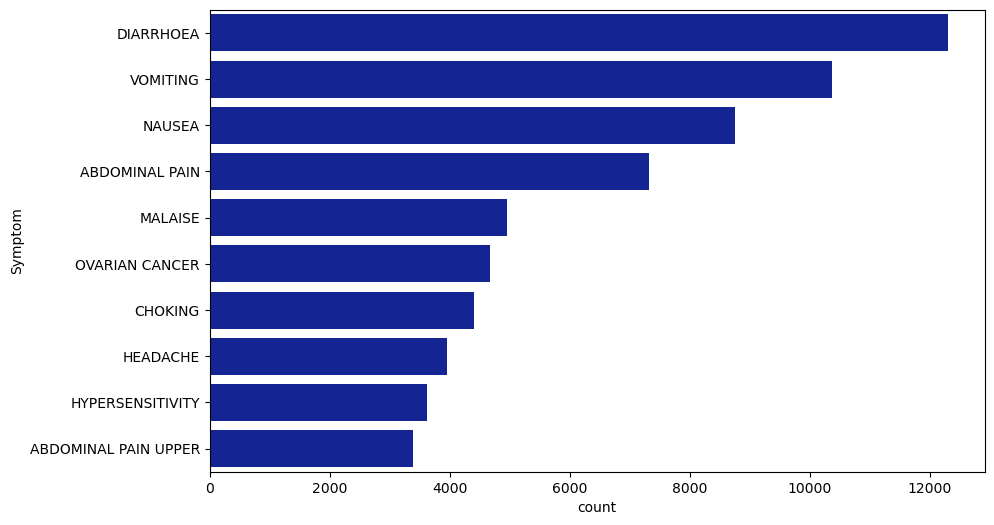

In [45]:
# Split the 'Symptoms' column by commas and create a new DataFrame with one symptom per row
split_df = df['Symptoms'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).reset_index(name='Symptom')

# Plot the count of each symptom using a countplot
plt.figure(figsize=(10, 6))
sns.countplot(y='Symptom', data=split_df, color='#0014a8', order=split_df['Symptom'].value_counts().head(10).index)

# Display the plot
plt.show()
